<h1>Novel Prize Winners</h1>
<img src="https://news.columbia.edu/sites/default/files/styles/cu_crop/public/content/2022/nobel-prize-medal-2.jpg?itok=6WkTd0wD" alt="notext" width="1920" height="600"/>
<strong>What is the most commonly awarded gender and birth country? Storing the string answers as top_gender and top_country.</strong>

sex
Male    905
Name: count, dtype: int64
birth_country
United States of America    291
Name: count, dtype: int64


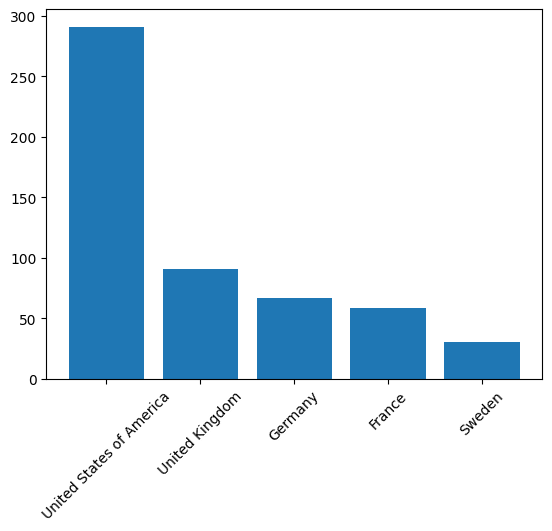

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

##Import data into dataframe

df = pd.read_csv("nobel.csv")

top_gender = df["sex"].value_counts().head(1)
print(top_gender)

top_country = df["birth_country"].value_counts().head(1)
print(top_country)

plt.bar(df["birth_country"].value_counts().head(5).index, df["birth_country"].value_counts().head(5).values)
plt.xticks(rotation=45)
plt.show()

<strong> What decade had the highest proportion of US-born winners? Store this as an integer called max_decade_usa</strong>

In [6]:
df["decade"] = (np.floor(df['year'] / 10) * 10).astype(int)

df['USWinners'] = df["birth_country"] == "United States of America"

Max_decade_usa = df.groupby("decade").agg(proportion = ('USWinners', 'mean')).sort_values(by='proportion', ascending=False).index[0]
print(Max_decade_usa)


2000


<strong>What decade and category pair had the highest proportion of female laureates? Store this as a dictionary called max_female_dict where the decade is the key and the category is the value.</strong>

In [ ]:
#Group by decade and category. Then, using column sex, filter for 'Female' winners using lambda. After calculate the mean of female winners.
proportions = df.groupby(['decade', 'category'])['sex'].apply(lambda x: (x == 'Female').mean()).reset_index()
print(proportions)
# Find the maximum proportion
max_proportion_row = proportions.loc[proportions['sex'].idxmax()]

# Create a dictionary with the result
max_female_dict = {
    max_proportion_row['decade']:max_proportion_row['category']
}

print(max_female_dict)

    decade    category       sex
0     1900   Chemistry  0.000000
1     1900  Literature  0.100000
2     1900    Medicine  0.000000
3     1900       Peace  0.071429
4     1900     Physics  0.076923
..     ...         ...       ...
67    2020   Economics  0.111111
68    2020  Literature  0.500000
69    2020    Medicine  0.125000
70    2020       Peace  0.285714
71    2020     Physics  0.166667

[72 rows x 3 columns]
{2020: 'Literature'}


<strong>Who was the first woman to receive a Nobel Prize, and in what category? Save your string answers as first_woman_name and first_woman_category</strong>

In [ ]:
first_woman_name = df[df['sex'] == 'Female']['full_name'].iloc[0]
print(first_woman_name)

first_woman_category = df[df['sex'] == 'Female']['category'].iloc[0]
print(first_woman_category)

Marie Curie, née Sklodowska
Physics


<strong>Which individuals or organizations have won multiple Nobel Prizes throughout the years? Store the full names in a list named repeat_list.</strong>

In [ ]:
winners = df['full_name'].value_counts()
repeat_list = winners[winners.values > 1].index.tolist()
print(repeat_list)


['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']
